<h1 style= 'color: blue; font-size: 36px'>Guerra da Ucrania</h1>

<h1 style= 'font-size: 30px;'>Baixas Russas</h1>
<hr style= 'solid gray'>

<img width='3300px' src='imagens/69c19e9f-4db0-433f-afd3-e0231fbf2011-AP_Russia_Ukraine_War_28.png'>

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation
from itertools import count
plt.rc('figure', figsize= (14, 6))
sns.set_theme(style="darkgrid")

## Dataset
<hr>

### Fonte dataset: https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war

#### Descrição: 

<p style='font-size: 14px; margin: 10px 50px;'> Essa é uma visão geral das baixas russas na guerra da Ucrania baseado em uma dataset criado pelo o perfil <b>(Petro) Data Scientist, PhD na CheAI Lviv, Lviv Oblast, Ucraine</b>.</p>

<p style='font-size: 14px; margin: 10px 50px;'>O objetivo é fazer uma comparação da grande perca humana na guerra da Ucrania, observando as baixas dos dois lados da guerra e análisando de forma inteira somando ambos os lados de forma geral.</p>

In [36]:
dados = pd.read_csv('dados/russia_losses_personnel.csv')

In [37]:
dados

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0.0
1,2022-02-26,3,4300,about,0.0
2,2022-02-27,4,4500,about,0.0
3,2022-02-28,5,5300,about,0.0
4,2022-03-01,6,5710,about,200.0
...,...,...,...,...,...
334,2023-01-25,336,123080,about,NaN
335,2023-01-26,337,123860,about,NaN
336,2023-01-27,338,124710,about,NaN
337,2023-01-28,339,125510,about,NaN


In [38]:
dados_ = dados.drop(columns=['personnel*', 'POW'])
dados_

,date,day,personnel
0,2022-02-25,2,2800
1,2022-02-26,3,4300
2,2022-02-27,4,4500
3,2022-02-28,5,5300
4,2022-03-01,6,5710
...,...,...,...
334,2023-01-25,336,123080
335,2023-01-26,337,123860
336,2023-01-27,338,124710
337,2023-01-28,339,125510


In [39]:
x= dados_['date']
y= dados_['personnel']

In [40]:
dados_['date'] = pd.to_datetime(dados_['date'])

### 1- Periodo 
<hr>

<p style='font-size: 14px'>O gráfico abaixo mostra o periode da coleta de dados de 25/2/2022 a 29/1/2023.</p>

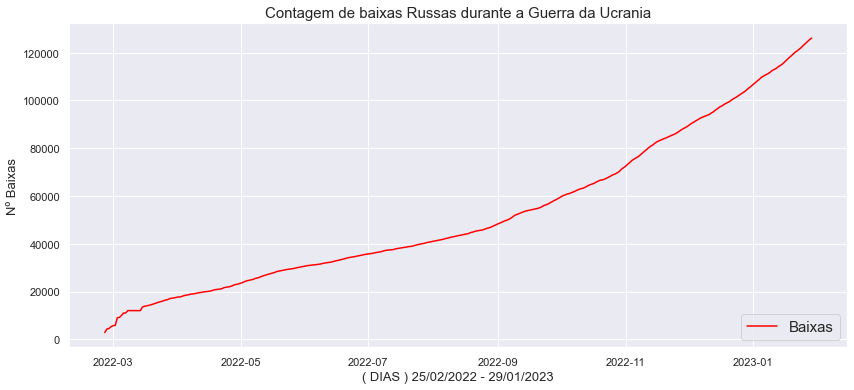

In [41]:
fig = plt.figure(figsize=(12,5))
eixo = fig.add_axes([0, 0, 0.9, 0.9])
eixo.plot(dados_['date'], y, color='red')
eixo.set_title('Contagem de baixas Russas durante a Guerra da Ucrania', fontsize=15)
eixo.set_ylabel('Nº Baixas', fontsize=13)
eixo.set_xlabel('( DIAS ) 25/02/2022 - 29/01/2023', fontsize=13)
eixo.legend(['Baixas'], loc= 'lower right', fontsize=15)

### 1.1 Começo do conflito 25/2 - 25/5
<hr>

<p style='font-size: 14px'>Em 25 de janeiro de 2022 a Rússia ilegalmente invadiu a Ucrânia e suas principais cidades inclusive a capital Kiev foi fortemente bombardeada, nas primeiras semanas a incursão Russa foi forte, garantido a superioridade aeria e terrestre, porem as tropas russas tiveram forte baixas no começo do conflito e no decorrer.</p>

In [42]:
import datetime

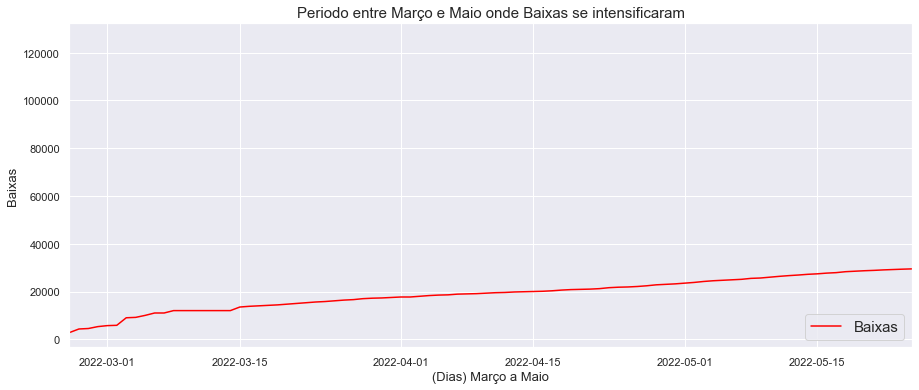

In [43]:
fig = plt.figure(figsize=(13,5))
eixo = fig.add_axes([0, 0, 0.9, 0.9])
eixo.plot(dados_['date'], y, color='red')
#eixo.bar(dados_['date'], y)

eixo.set_xlim(datetime.datetime(2022,2,25), datetime.datetime(2022,5,25))
eixo.set_title('Periodo entre Março e Maio onde Baixas se intensificaram', fontsize=15)
eixo.set_ylabel('Baixas', fontsize=13)
eixo.set_xlabel('(Dias) Março a Maio', fontsize=13)
eixo.legend(['Baixas'], loc= 'lower right', fontsize=15)

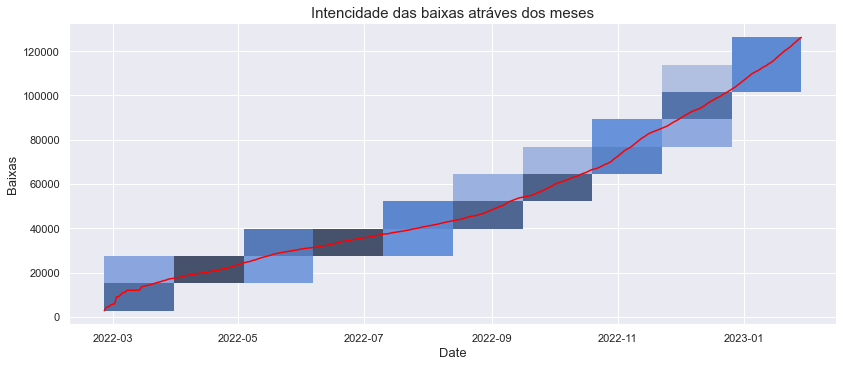

In [44]:
ax = sns.displot(data=dados_, x="date", y="personnel")
ax = sns.lineplot(data=dados_, x="date", y="personnel", color='red')
ax.set_title('Intencidade das baixas atráves dos meses', fontsize=15)
ax.set_ylabel('Baixas', fontsize=13)
ax.set_xlabel('Date', fontsize=13)
ax.figure.set_size_inches(14,5)

In [45]:
total_baixas = dados_['personnel'].sum()
total_baixas

17878406

Text(0.5, 0, 'Mês de Janeiro (2023)')

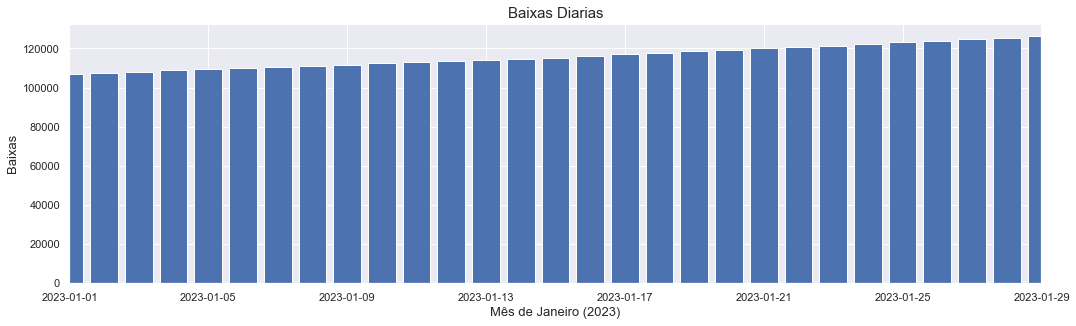

In [46]:
fig = plt.figure(figsize=(15,4))
eixo = fig.add_axes([0, 0, 0.9, 0.9])
eixo.bar(dados_['date'], y)

eixo.set_xlim(datetime.datetime(2023,1,1), datetime.datetime(2023,1,29))
eixo.set_title('Baixas Diarias', fontsize=15)
eixo.set_ylabel('Baixas', fontsize=13)
eixo.set_xlabel('Mês de Janeiro (2023)', fontsize=13)

<h1 style= 'color: blue; font-size: 33px'>Perda de Equipamentos</h1>
<hr>

<img width='3300px' src='imagens/tank.png'>

<p>A Rússia provavelmente perdeu mais de 2.000 tanques em sua guerra na Ucrânia, mais da metade de sua frota de tanques operacionais, de acordo com estimativas divulgadas na quarta-feira pelo Instituto Internacional de Estudos Estratégicos.</p>
    
<p>A Ucrânia reivindica cerca de 3.300 perdas de tanques russos. A Oryx, uma equipe independente de analistas que rastreou inteligência de código aberto sobre perdas de equipamentos durante a guerra, estimou que mais de 1.700 tanques russos foram destruídos, danificados ou capturados.</p>

##### Fonte The Wall Street Journal : https://en.wikipedia.org/wiki/2022_Kherson_counteroffensive
<i style='font-size: 12px;'>Feb. 15, 2023 11:41</i>

In [47]:
data = pd.read_csv('dados/russia_losses_equipment.csv')
data.head(10)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN
5,2022-03-02,7,30,31,211,862,85,40,355.0,60.0,3,2,9,NaN,NaN,NaN,NaN,NaN
6,2022-03-03,8,30,31,217,900,90,42,374.0,60.0,3,2,11,NaN,NaN,NaN,NaN,NaN
7,2022-03-04,9,33,37,251,939,105,50,404.0,60.0,3,2,18,NaN,NaN,NaN,NaN,NaN
8,2022-03-05,10,39,40,269,945,105,50,409.0,60.0,3,2,19,NaN,NaN,NaN,NaN,NaN
9,2022-03-06,11,44,48,285,985,109,50,447.0,60.0,4,2,21,NaN,NaN,NaN,NaN,NaN


In [48]:
data.columns

Index(['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system', 'greatest losses direction',
       'vehicles and fuel tanks', 'cruise missiles'],
      dtype='object')

In [49]:
data['cruise missiles'].isna().count()

339

In [50]:
data['cruise missiles'].max()

796.0

In [51]:
data['cruise missiles'].min()

84.0

In [52]:
cruise_missiles = data['cruise missiles'].dropna()
cruise_missiles.head()

65    84.0
66    84.0
67    84.0
68    87.0
69    89.0
Name: cruise missiles, dtype: float64

In [53]:
data['cruise missiles'].isna().sum()

65

In [54]:
data['cruise missiles'].notna().sum()

274

In [55]:
Aircraft = data['aircraft'].isna().sum()
helicopter = data['helicopter'].isna().sum()
tank = data['tank'].isna().sum()
drones = data['drone'].isna().sum()
anti_aircraft = data['anti-aircraft warfare'].isna().sum()
print('Verificação de variáveis (null); Aircraft=',Aircraft, 'Helicopter= ',helicopter, 'tank = ', tank,'drones= ', drones, 'anti_aircraft= ', anti_aircraft)

Verificação de variáveis (null); Aircraft= 0 Helicopter=  0 tank =  0 drones=  0 anti_aircraft=  0


In [56]:
data['date'] = pd.to_datetime(data['date'])

In [57]:
df = pd.DataFrame(data, columns=['date', 'aircraft', 'helicopter', 'tank', 'drone', 'anti-aircraft warfare'])
df.head()

,date,aircraft,helicopter,tank,drone,anti-aircraft warfare
0,2022-02-25,10,7,80,0,0
1,2022-02-26,27,26,146,2,0
2,2022-02-27,27,26,150,2,0
3,2022-02-28,29,29,150,3,5
4,2022-03-01,29,29,198,3,7


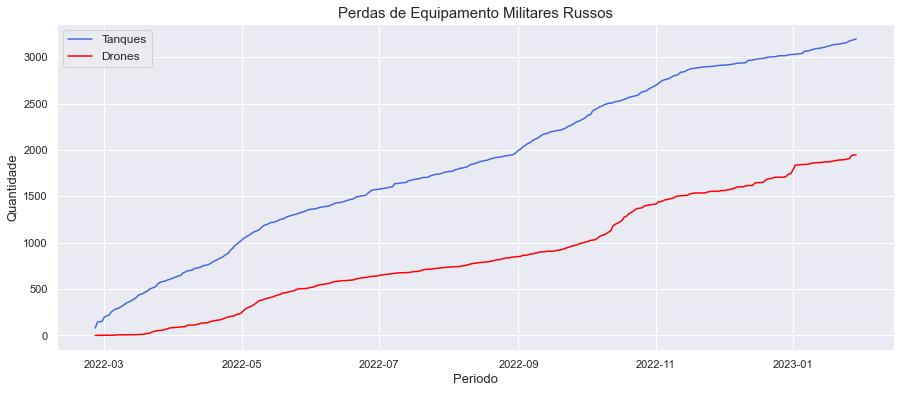

In [58]:
ax = sns.lineplot(data=data, x="date", y="tank", color='RoyalBlue')
ax = sns.lineplot(data=data, x="date", y="drone", color='Red')

ax.legend(["Tanques", "Drones"], loc= 'upper left', fontsize=12)
ax.set_title('Perdas de Equipamento Militares Russos', fontsize=15)
ax.set_xlabel('Periodo', fontsize=13)
ax.set_ylabel('Quantidade', fontsize=13)
ax.figure.set_size_inches(15,6)

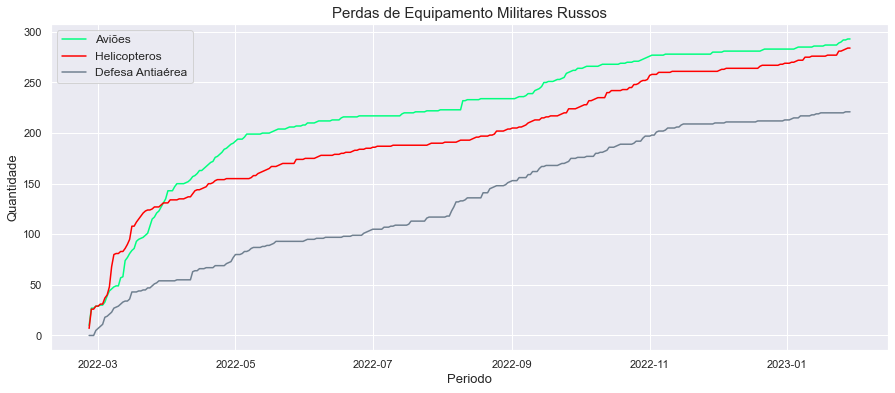

In [59]:
ax2 = sns.lineplot(data=data, x="date", y="aircraft", color='SpringGreen')
ax2 = sns.lineplot(data=data, x="date", y="helicopter", color='red')
ax2 = sns.lineplot(data=data, x="date", y="anti-aircraft warfare", color='SlateGrey')

ax2.legend(["Aviões", "Helicopteros", "Defesa Antiaérea"], loc= 'upper left', fontsize=12)
ax2.set_title('Perdas de Equipamento Militares Russos', fontsize=15)
ax2.set_xlabel('Periodo', fontsize=13)
ax2.set_ylabel('Quantidade', fontsize=13)
ax2.figure.set_size_inches(15,6)

In [60]:
import plotly.graph_objects as go

In [61]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['date'], y=df['aircraft'], name='Aviões'))
fig.add_trace(go.Scatter(x=df['date'], y=df['helicopter'], name='Helicopteros'))
fig.add_trace(go.Scatter(x=df['date'], y=df['tank'], name='Tanques'))
fig.add_trace(go.Scatter(x=df['date'], y=df['drone'], name='Drones'))
fig.add_trace(go.Scatter(x=df['date'], y=df['anti-aircraft warfare'], name='Defesa Antiaérea'))

fig.update_layout(title='Grafico Interativo das Perdas de Equipamento Militares Russos')

In [62]:
Aircraft = data['aircraft'].max()
helicopter = data['helicopter'].max()
tank = data['tank'].max()
drones = data['drone'].max()
anti_aircraft = data['anti-aircraft warfare'].max()
print('Total de perdas')
print('Aircraft=',Aircraft )
print('Helicopter= ',helicopter)
print('tank = ', tank)
print('drones= ', drones)
print('anti_aircraft= ', anti_aircraft)

Total de perdas
Aircraft= 293
Helicopter=  284
tank =  3197
drones=  1947
anti_aircraft=  221


In [63]:
data2 = {'Equipamento': ['Aviões', 'Helicopteros', 'Tanques', 'Drones', 'Defesa Antiaérea'], 'Total': [293, 284, 3197, 1947, 221]}

In [64]:
df2 = pd.DataFrame(data2).sort_values(by='Total', ascending=False)
df2

,Equipamento,Total
2,Tanques,3197
3,Drones,1947
0,Aviões,293
1,Helicopteros,284
4,Defesa Antiaérea,221


Text(0.5, 1.0, 'Total das Perdas')

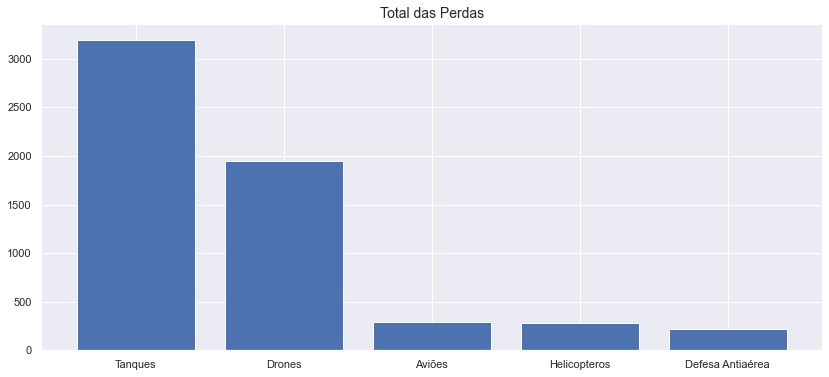

In [65]:
plt.bar(df2['Equipamento'], df2['Total'])
plt.title('Total das Perdas', fontsize=14)

In [66]:
import plotly.express as px

In [67]:
fig = px.treemap(df2, path=["Equipamento"], values="Total")
fig.update_layout(title='TreeMap das Perdas')

fig.show()

C:\Users\henri\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [68]:
import datetime
from matplotlib.dates import date2num

### A contra-ofensiva do Oblast de Kherson e Mykolaiv teve algum efeito sobre os equimentos russos ?
<hr>

<p>Uma contra-ofensiva militar foi lançada pela Ucrânia em 29 de agosto de 2022 para expulsar as forças russas que ocupavam as regiões do sul dos oblasts de Kherson e Mykolaiv.

Analistas militares consideram a contra-ofensiva a terceira fase estratégica da guerra na Ucrânia, juntamente com a contra-ofensiva oriental concomitante, após a invasão inicial e a Batalha de Donbass.

Depois de muitos ataques contra alvos militares russos, a Ucrânia anunciou o início de uma contra-ofensiva em grande escala em 29 de agosto de 2022. Em 9 de outubro, a Ucrânia disse ter recapturado 1.170 quilômetros quadrados de terra. Em 9 de novembro, as tropas russas receberam ordens de se retirar de Kherson, a única capital regional capturada desde o início da invasão. As forças ucranianas libertaram a cidade de Kherson dois dias depois, em 11 de novembro.</p>

##### Fonte Wikipedia : https://en.wikipedia.org/wiki/2022_Kherson_counteroffensive

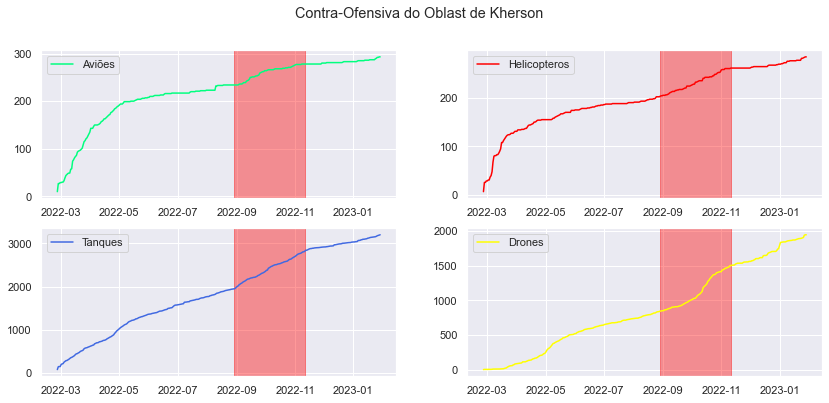

In [69]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2)
(ax1, ax2), (ax3, ax4) = gs.subplots()
fig.suptitle('Contra-Ofensiva do Oblast de Kherson')
ax1.plot(df['date'], df['aircraft'], color='SpringGreen')
ax1.axvspan(date2num(datetime.datetime(2022,8,29)), date2num(datetime.datetime(2022,11,11)), color="red", alpha=0.4)
ax1.legend(['Aviões'], loc='upper left')
ax2.plot(df['date'], df['helicopter'], color='Red')
ax2.axvspan(date2num(datetime.datetime(2022,8,29)), date2num(datetime.datetime(2022,11,11)), color="red", alpha=0.4)
ax2.legend(['Helicopteros'], loc='upper left')
ax3.plot(df['date'], df['tank'], color='RoyalBlue')
ax3.axvspan(date2num(datetime.datetime(2022,8,29)), date2num(datetime.datetime(2022,11,11)), color="red", alpha=0.4)
ax3.legend(['Tanques'], loc='upper left')
ax4.plot(df['date'], df['drone'], color='yellow')
ax4.axvspan(date2num(datetime.datetime(2022,8,29)), date2num(datetime.datetime(2022,11,11)), color="red", alpha=0.4)
ax4.legend(['Drones'], loc='upper left')

### Contra-ofensiva do Oblast de Kharkiv
<hr>

<p>A contra-ofensiva de Kharkiv em 2022 foi uma contra-ofensiva das Forças Armadas da Ucrânia no território ucraniano ocupado pela Rússia no Oblast de Kharkiv, lançada em 6 de setembro de 2022. Após o lançamento da contra-ofensiva Kherson no sul da Ucrânia no final de agosto, as forças ucranianas começaram uma segunda contra-ofensiva no início de setembro em Kharkiv Oblast, no leste da Ucrânia.

Durante a ofensiva, a Ucrânia havia retomado mais de 500 assentamentos e 12.000 quilômetros quadrados de território na região de Kharkiv.</p>

##### Fonte Wikipedia : https://en.wikipedia.org/wiki/2022_Kharkiv_counteroffensive

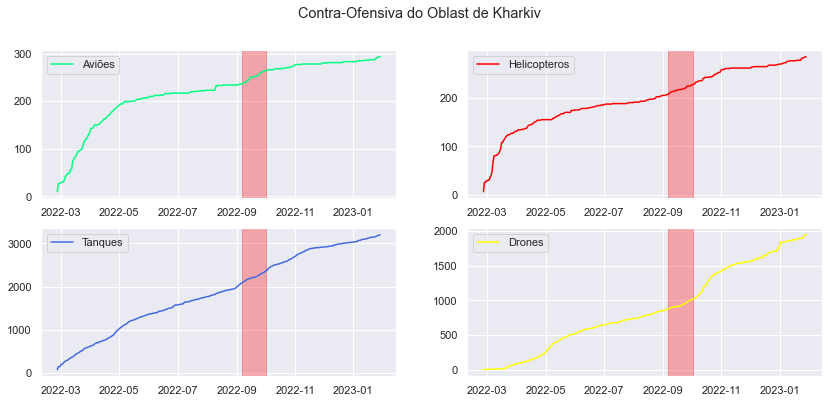

In [70]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2)
(ax1, ax2), (ax3, ax4) = gs.subplots()
fig.suptitle('Contra-Ofensiva do Oblast de Kharkiv')
ax1.plot(df['date'], df['aircraft'], color='SpringGreen')
ax1.axvspan(date2num(datetime.datetime(2022,9,6)), date2num(datetime.datetime(2022,10,2)), color="red", alpha=0.3)
ax1.legend(['Aviões'], loc='upper left')
ax2.plot(df['date'], df['helicopter'], color='Red')
ax2.axvspan(date2num(datetime.datetime(2022,9,6)), date2num(datetime.datetime(2022,10,2)), color="red", alpha=0.3)
ax2.legend(['Helicopteros'], loc='upper left')
ax3.plot(df['date'], df['tank'], color='RoyalBlue')
ax3.axvspan(date2num(datetime.datetime(2022,9,6)), date2num(datetime.datetime(2022,10,2)), color="red", alpha=0.3)
ax3.legend(['Tanques'], loc='upper left')
ax4.plot(df['date'], df['drone'], color='yellow')
ax4.axvspan(date2num(datetime.datetime(2022,9,6)), date2num(datetime.datetime(2022,10,2)), color="red", alpha=0.3)
ax4.legend(['Drones'], loc='upper left')